In [2]:
from owlready2 import *

# Création d'une nouvelle ontologie
onto = get_ontology("http://www.semanticweb.org/maintenance#")

with onto:
    # Définition des classes
    class Equipement(Thing): pass
    class System(Thing): pass
    class SubSystem(Thing): pass
    class Component(Thing): pass
    class Sensor(Thing): pass
    class Diagnostic(Thing): pass
    class Failure_Mode(Thing): pass
    class Failure_Event(Thing): pass
    class Alert(Thing): pass
    class Notification(Thing): pass
    class Diagnostic_Maintenance(Thing): pass
    class Maintenance_Action(Thing): pass

    # Définition des relations (propriétés d'objets)
    class hasSystem(ObjectProperty):
        domain = [Equipement]
        range = [System]

    class hasSubSystem(ObjectProperty):
        domain = [System]
        range = [SubSystem]

    class hasComponent(ObjectProperty):
        domain = [SubSystem]
        range = [Component]

    class isMonitoredBy(ObjectProperty):
        domain = [Component]
        range = [Sensor]

    class identifies(ObjectProperty):
        domain = [Diagnostic]
        range = [Failure_Mode]

    class causedBy(ObjectProperty):
        domain = [Failure_Event]
        range = [Diagnostic]

    class affects(ObjectProperty):
        domain = [Component]
        range = [Failure_Event]

    class generates(ObjectProperty):
        domain = [Failure_Event]
        range = [Alert]

    class requires(ObjectProperty):
        domain = [Alert]
        range = [Diagnostic_Maintenance]

    # Définition des attributs (propriétés de données)
    class Reference(DataProperty):
        domain = [Equipement]
        range = [str]

    class Source(DataProperty):
        domain = [System]
        range = [str]

    class Circuit(DataProperty):
        domain = [SubSystem]
        range = [str]

    class ComponentName(DataProperty):
        domain = [Component]
        range = [str]

    class CID(DataProperty):
        domain = [Component]
        range = [int]

    class EventCode(DataProperty):
        domain = [Component]
        range = [str]

    class SensorID(DataProperty):
        domain = [Sensor]
        range = [int]

    class Type(DataProperty):
        domain = [Sensor]
        range = [str]

    class Unit(DataProperty):
        domain = [Sensor]
        range = [str]

    class Threshold(DataProperty):
        domain = [Sensor]
        range = [int]

    class Value(DataProperty):
        domain = [Sensor]
        range = [float]

    class Timestamp(DataProperty):
        domain = [Diagnostic]
        range = [str]

    class Severity(DataProperty):
        domain = [Diagnostic]
        range = [int]

    class OperatingHour(DataProperty):
        domain = [Diagnostic]
        range = [float]

    class Occurrence(DataProperty):
        domain = [Diagnostic]
        range = [int]

    class WarningLevel(DataProperty):
        domain = [Alert]
        range = [str]

    class FailureDescription(DataProperty):
        domain = [Failure_Mode]
        range = [str]

    class TimeToRepair(DataProperty):
        domain = [Diagnostic_Maintenance]
        range = [int]

    class RepairDate(DataProperty):
        domain = [Diagnostic_Maintenance]
        range = [str]

# Sauvegarde de l'ontologie dans un fichier OWL
onto.save(file="maintenance.owl", format="rdfxml")
print("Ontologie OWL générée avec succès sous 'maintenance.owl'.")


Ontologie OWL générée avec succès sous 'maintenance.owl'.


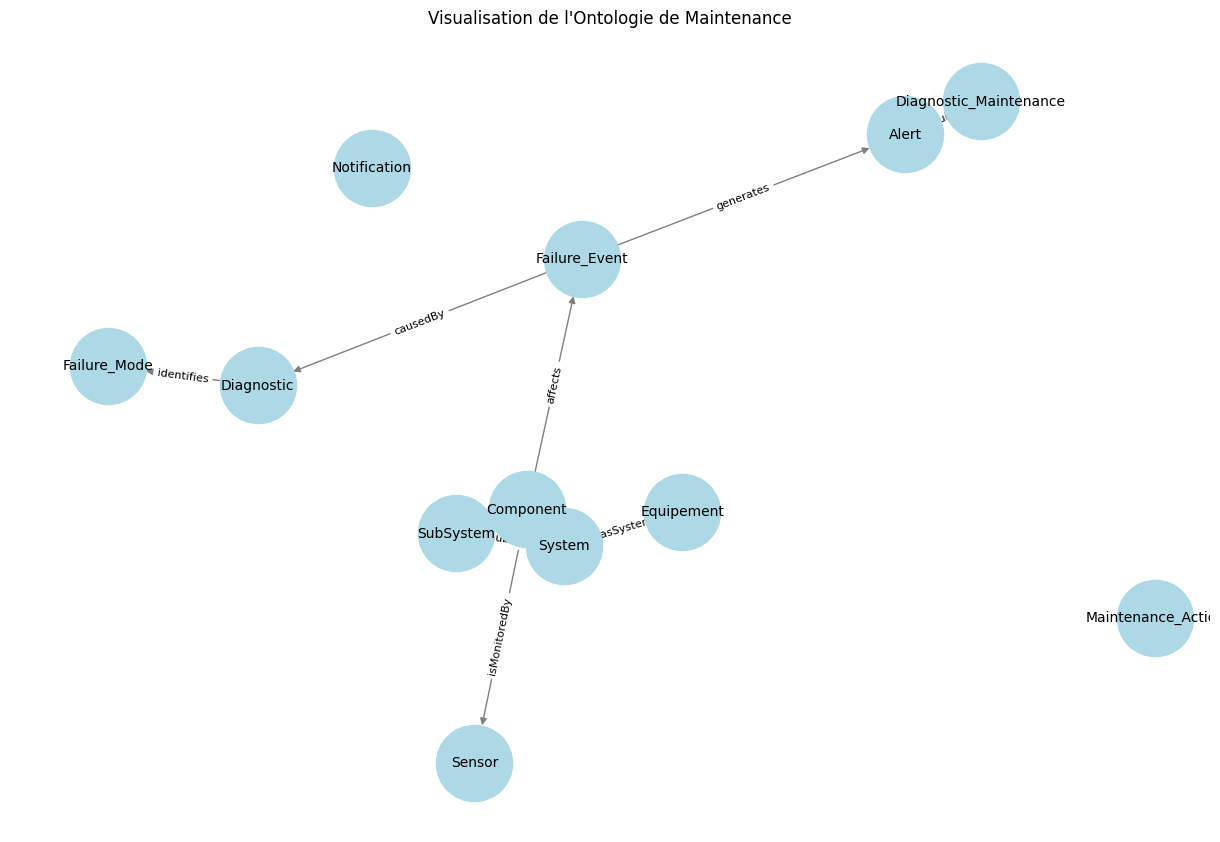

In [3]:
from owlready2 import *
import networkx as nx
import matplotlib.pyplot as plt

# Charger l'ontologie
onto = get_ontology("maintenance.owl").load()

# Créer un graphe
G = nx.DiGraph()

# Ajouter les classes au graphe
for cls in onto.classes():
    G.add_node(cls.name)

# Ajouter les relations (propriétés d'objets)
for prop in onto.object_properties():
    for domain in prop.domain:
        for range_cls in prop.range:
            G.add_edge(domain.name, range_cls.name, label=prop.name)

# Dessiner le graphe
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Visualisation de l'Ontologie de Maintenance")
plt.show()
